In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_folder = "/data/Pein/Pytorch/Wind-Power-Prediction/res_output/"

time_folder = "24-08-22-seq_8-search"


path = base_folder + time_folder + "_result/" + time_folder + "-joined_metrics.csv"
df = pd.read_csv(path)

# Truncate values larger than 3000 to be 3000
clip_value = 100000
df["train_rmse"] = df["train_rmse"].clip(upper=clip_value)
df["val_rmse"] = df["val_rmse"].clip(upper=clip_value)
df["test_rmse"] = df["test_rmse"].clip(upper=clip_value)

# Display the first few rows of the dataframe
print(df.columns)

# remove those rows where the val_rmse and test_rmse are larger than 1000
# df = df[df["val_rmse"] <= 1000]
# df = df[df["test_rmse"] <= 1000]

# remove df where the rows values are repeated
df = df.drop_duplicates(subset=["train_rmse", "val_rmse", "test_rmse"], keep="first")


Index(['exp_date', 'train_rmse', 'train_custom_acc', 'val_rmse_for_best_train',
       'val_custom_acc_for_best_train', 'test_rmse_for_best_train',
       'test_custom_acc_for_best_train', 'train_epoch_for_best_train',
       'val_rmse', 'val_custom_acc', 'train_rmse_for_best_val',
       'train_custom_acc_for_best_val', 'test_rmse_for_best_val',
       'test_custom_acc_for_best_val', 'val_epoch_for_best_val', 'test_rmse',
       'test_custom_acc', 'train_rmse_for_best_test',
       'train_custom_acc_for_best_test', 'val_rmse_for_best_test',
       'val_custom_acc_for_best_test', 'test_epoch_for_best_test', 'vs', 'd',
       'hd', 'ld', 'td', 'timed', 'pd', 'el', 'nh', 'cd', 'tck', 'fck', 'nt',
       'sm', 'up', 'sl', 'mlp', 'ep', 'bs', 'lr', 'dp', 'wd'],
      dtype='object')


In [3]:
import math


def plot_rmse_effects(
    df, x, y=["train_custom_acc", "val_custom_acc", "test_custom_acc"]
):
    for rmse in y:
        # Calculate the grid size
        num_features = len(x)
        num_rows = math.ceil(num_features / 3)  # Number of rows required
        num_cols = min(3, num_features)  # Number of columns (max 3)

        # Create subplots with the calculated grid size
        fig, axes = plt.subplots(
            num_rows, num_cols, figsize=(6 * num_cols, 6 * num_rows)
        )

        # Flatten axes array if there's more than one row
        if num_rows > 1:
            axes = axes.flatten()
        else:
            axes = [axes]  # Wrap single row axes in a list

        for i, feature in enumerate(x):
            sns.boxplot(ax=axes[i], x=feature, y=rmse, data=df)
            for label in axes[i].get_xticklabels():
                label.set_rotation(45)

        # Remove any empty subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        # Adjust layout to make sure plots are not overlapping
        plt.tight_layout()
        plt.show()

Available features to plot: ['wd', 'vs', 'mlp', 'sl', 'ep', 'lr', 'd', 'hd', 'ld', 'td', 'timed', 'pd', 'el', 'tck', 'cd', 'fck', 'dp', 'nt', 'nh', 'up', 'sm', 'bs']


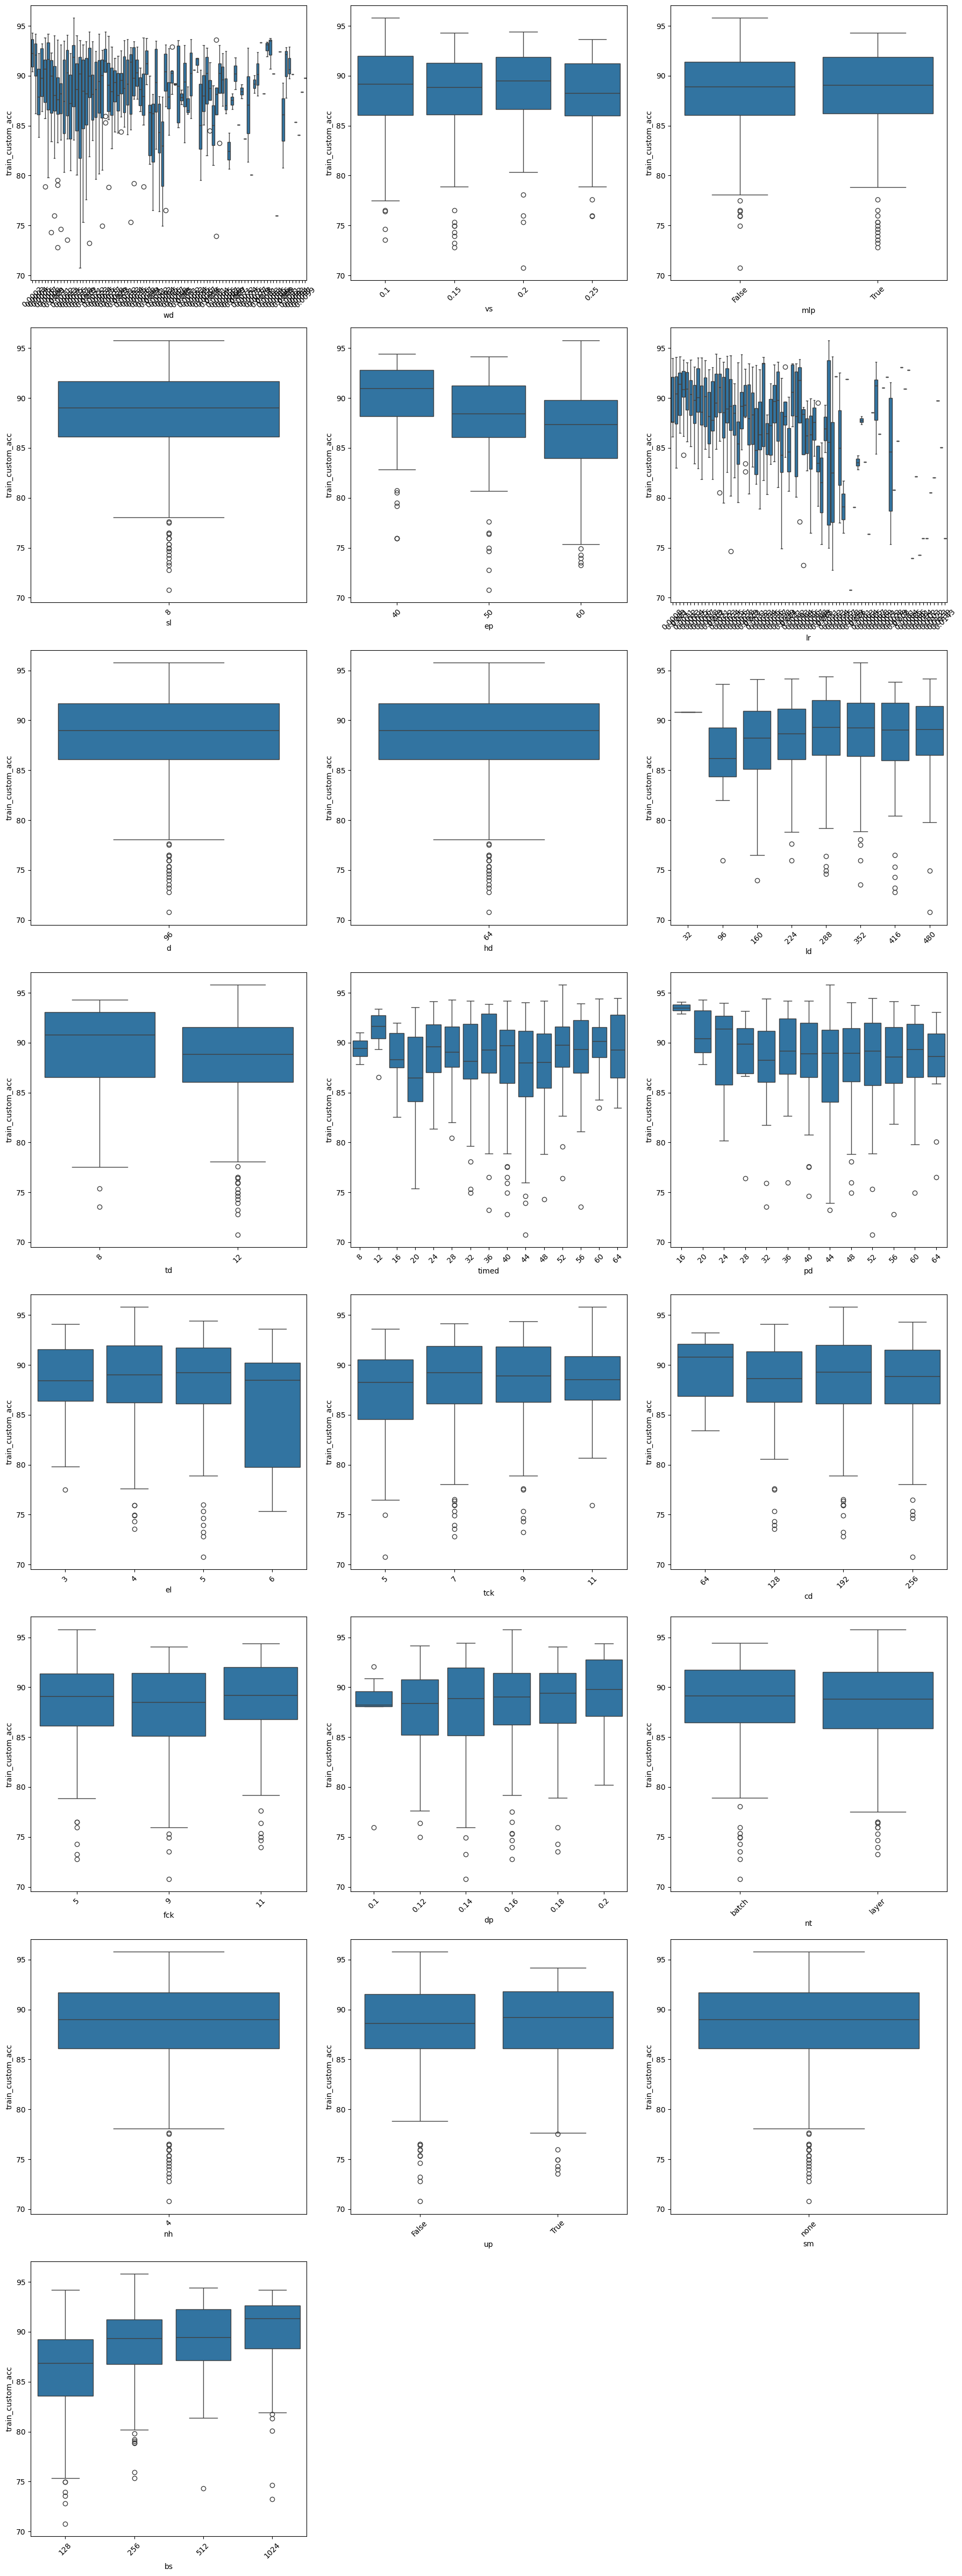

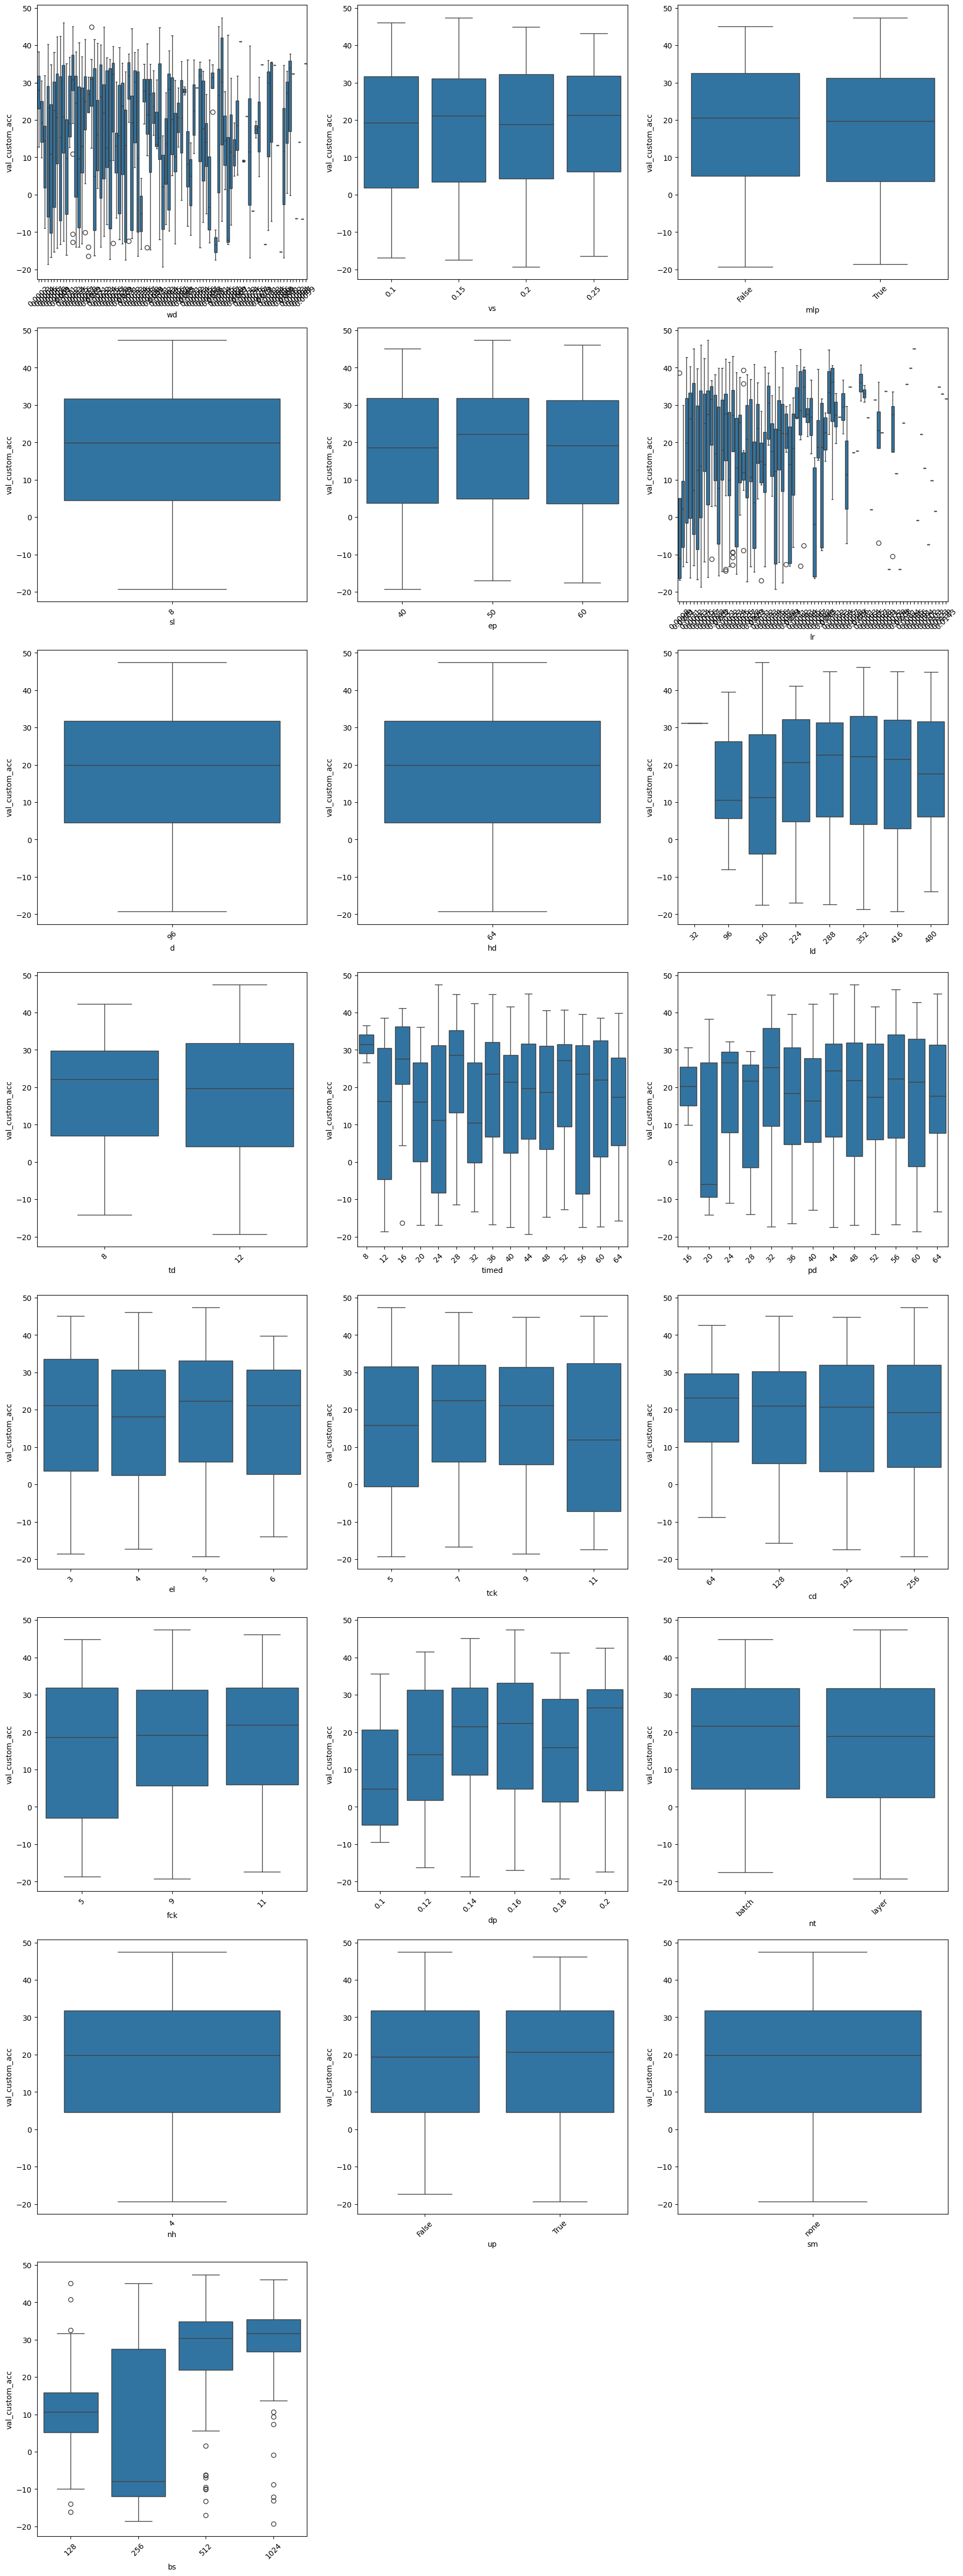

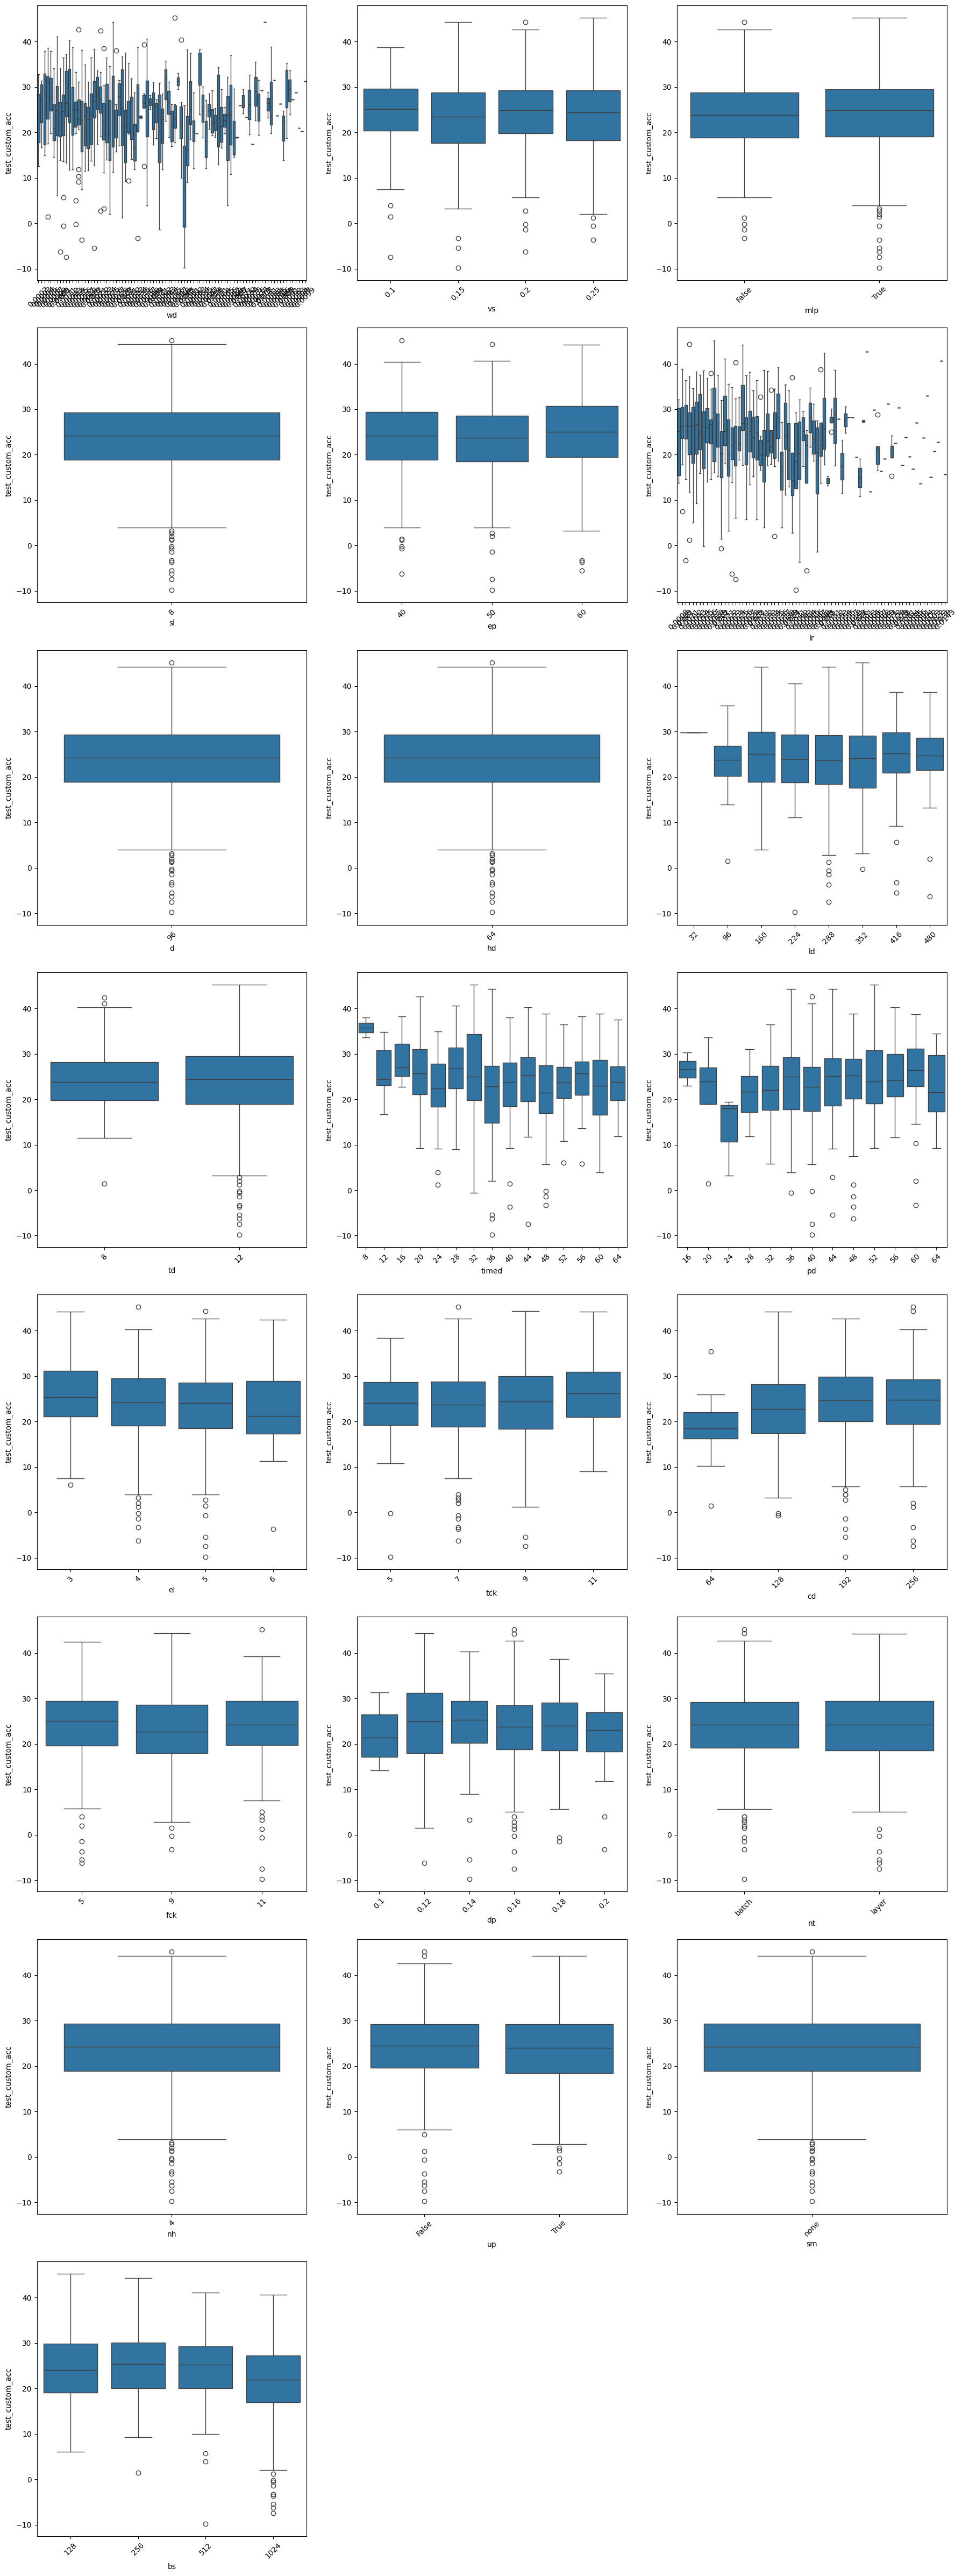

In [4]:
plot_features = [
    "w_decay",  # weight_decay
    "val_splt",  # val_split
    "mlp_norm",  # mlp_norm
    "seq_len",  # seq_len
    "ep",  # train_epochs
    "lr",  # learning_rate
    "d",  # d_model
    "hd",  # hidden_d_model
    "ld",  # last_d_model
    "tok_d",  # token_d_model
    "time_d",  # time_d_model
    "pos_d",  # pos_d_model
    "lyrs",  # e_layers
    "tok_kern",  # token_conv_kernel
    "conv_d",  # conv_out_dim
    "feat_kern",  # feat_conv_kernel
    "dp",  # dropout
    "norm_typ",  # norm_type
    "n_heads",  # num_heads
    "use_pos_enc",  # use_pos_enc
    "skp_mod",  # skip_connection_mode
    "bs",  # batch_size
    "ep",  # train_epochs (keeping this consistent with "ep" above)
]


# Check which features are in the DataFrame
available_features = [feature for feature in plot_features if feature in df.columns]

# Print the available features
print("Available features to plot:", available_features)

# Now, you can plot the effects using the available features
plot_rmse_effects(df, x=available_features)

In [5]:
# Calculate the sum of rmse values for each row

df["sum_rmse"] = 0 * df["train_rmse"] + 0.4 * df["val_rmse"] + 0.4 * df["test_rmse"]

# Sort the rows based on the sum of rmse values
sorted_df = df.sort_values(by="sum_rmse", ascending=True)


In [6]:
sorted_df.columns

Index(['exp_date', 'train_rmse', 'train_custom_acc', 'val_rmse_for_best_train',
       'val_custom_acc_for_best_train', 'test_rmse_for_best_train',
       'test_custom_acc_for_best_train', 'train_epoch_for_best_train',
       'val_rmse', 'val_custom_acc', 'train_rmse_for_best_val',
       'train_custom_acc_for_best_val', 'test_rmse_for_best_val',
       'test_custom_acc_for_best_val', 'val_epoch_for_best_val', 'test_rmse',
       'test_custom_acc', 'train_rmse_for_best_test',
       'train_custom_acc_for_best_test', 'val_rmse_for_best_test',
       'val_custom_acc_for_best_test', 'test_epoch_for_best_test', 'vs', 'd',
       'hd', 'ld', 'td', 'timed', 'pd', 'el', 'nh', 'cd', 'tck', 'fck', 'nt',
       'sm', 'up', 'sl', 'mlp', 'ep', 'bs', 'lr', 'dp', 'wd', 'sum_rmse'],
      dtype='object')

In [7]:
selected_cols = [
    "train_rmse",
    "train_custom_acc",
    "val_rmse",
    "val_custom_acc",
    "test_rmse_for_best_val",
    "test_rmse",
    "test_custom_acc",
    "val_custom_acc_for_best_test",
]
sorted_df[selected_cols].head(10)

,train_rmse,train_custom_acc,val_rmse,val_custom_acc,test_rmse_for_best_val,test_rmse,test_custom_acc,val_custom_acc_for_best_test
437,6327.8890,93.116379,65101.688,35.150295,72451.530,69255.484,37.212067,-7.671845
170,9441.6910,90.175484,66298.960,32.446308,75959.510,71591.305,27.287643,25.656694
294,5682.5670,94.029327,65962.910,34.606804,75267.040,71953.570,26.096361,25.906330
491,6520.7354,93.133659,68188.730,41.554554,74324.180,70556.290,26.405996,29.490131
455,11868.8620,86.920372,68032.120,23.996788,78482.090,71027.430,23.581791,30.147631
448,11852.5760,85.077583,70895.700,33.058453,70197.960,68381.945,40.615063,38.625759
210,12575.2480,88.166039,65361.977,30.800348,82545.490,74033.375,27.189381,44.332512
430,6388.8780,93.553032,70678.560,38.015469,69488.695,69109.555,29.958784,35.960464
372,5576.0930,94.034538,69301.600,39.564278,74505.625,70533.620,36.413990,35.721016
410,7655.8613,92.101692,69176.970,38.572098,71897.984,70679.055,25.134987,26.489580


In [8]:
# Print the top rows with the minimal sum of rmse
top_n = 10  # Number of top rows to print


# Drop the specified columns
columns_to_drop = [
    # "train_custom_acc_for_best_val",
    # "train_custom_acc",
    # "val_custom_acc",
    # "test_custom_acc",
    # "train_custom_acc_for_best_test",
    # "val_custom_acc_for_best_train",
    # "val_custom_acc_for_best_test",
    # "test_custom_acc_for_best_train",
    # "test_custom_acc_for_best_val",
]

output = sorted_df.head(top_n).drop(columns=columns_to_drop)


In [9]:
# print last few columns
print(output.iloc[:, -20:])

      ld  td  timed  pd  el  nh   cd  tck  fck     nt    sm     up  sl    mlp  \
437  416  12     28  60   4   4  256    7   11  batch  none   True   8   True   
170  224  12     28  44   3   4  192   11    9  layer  none   True   8   True   
294  352  12     32  48   4   4  256    9   11  batch  none   True   8   True   
491  288  12     36  52   4   4  192    9    5  layer  none   True   8  False   
455  352  12     40  52   4   4  256    7    9  batch  none   True   8   True   
448  224  12     28  36   5   4  192    9    5  layer  none  False   8  False   
210  416  12     48  48   4   4  256    7   11  batch  none  False   8   True   
430  416  12     48  56   3   4  256    7    5  layer  none   True   8  False   
372  224  12     40  36   3   4  192   11    9  batch  none  False   8   True   
410  352  12     12  60   4   4  256    9   11  layer  none  False   8  False   

     ep    bs      lr    dp      wd    sum_rmse  
437  40   256  0.0011  0.18  0.0011  53742.8688  
170  60 